# NBA Data Analytics (1950-2017)

Name : Krishna Agarwal  |  Hardik Shah

RED ID : 823363314      |  823375131 

# PYTHON LIBRARIES REQUIRED

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os

# NBA CSV PATH AND FILES

In [2]:
path = "C:\\Users\\krish\\Downloads\\nba-players-stats\\nba-players-stats\\"
NBA_STATS_CSV = path + "Seasons-Stats.csv"
NBA_PLAYER_CSV = path + "Players.csv"
NBA_POSITION_CSV = path + "player-data.csv"
NBA_MVP_CSV = path + "MVP.csv"
NBA_CHAMPS_CSV = path + "nba-champions.csv"
US_CENSUS_CSV = path + "US-statewise-census.csv"
REPORT_CSV = path + "Report.csv"

# Definition for cleaning the data

In [3]:
def cleaning_dataframe(column_list,file_path):
    nba_stats_df = pd.read_csv(file_path)
    nba_stats_df = nba_stats_df.dropna(subset=column_list)
    return nba_stats_df

# Career High Point Scorers

The career_points_top() definition gives the top career high point scorers of all time. The definition returns n records if arguement 'index_value' is provided, else it returns all the players points in descending order.

In [4]:
def career_points_top(**kwargs):
    #Cleaning the data based on columns requried
    nba_stats_df = cleaning_dataframe(['Player','PTS'],NBA_STATS_CSV)
    
    #The season stats contains duplicate records if the player was traded in-between seasons
    nba_top_scorer_df = nba_stats_df.drop_duplicates(subset=['Year','Player'], keep="first")
    
    #Grouping data based on Player and summing up the number of points
    nba_top_scorer_df = nba_stats_df.groupby('Player').agg({'PTS':'sum'})
    if kwargs.get('index_value',0):
        nba_top_scorer_df = nba_top_scorer_df.sort_values(by=["PTS"],ascending=False).head(kwargs['index_value'])
    else:
        nba_top_scorer_df = nba_top_scorer_df.sort_values(by=["PTS"],ascending=False)
    nba_top_scorer_df = nba_top_scorer_df.reset_index()
    return nba_top_scorer_df

In [5]:
def plot_career_points_top(**kwargs):
    nba_top_scorer_df = career_points_top(**kwargs)
    nba_top_scorer_df.plot('Player', 'PTS',kind='bar', fontsize =10, width =0.9,figsize=(15,5), title="Career High Scorers")

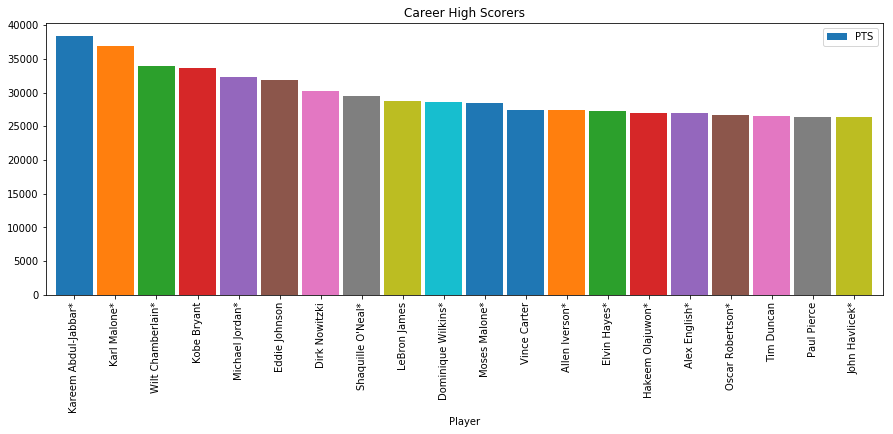

In [6]:
#The plot function accepts an integer which will be used to retrieve the top career points player
plot_career_points_top(index_value=20)

# Comparing the NBA Champions

The definition compare_nba_champs() gives the number of titles won and the number of runner's up by a team.

In [7]:
def compare_nba_champs():
    #Cleaning the data based on columns requried
    nba_champs_df = cleaning_dataframe(['Year','Champion','Results','Opponent'],NBA_CHAMPS_CSV)
    nba_champs_df = nba_champs_df[['Year','Champion','Results','Opponent']]
    
    #Renaming old franchise names to current ones
    lookupDict = {'Minneapolis Lakers':'Los Angeles Lakers', 'Syracuse Nationals':'Philadelphia 76ers',
                  'Philadelphia Warriors':'Philadelphia 76ers', 'Fort Wayne Pistons':'Detroit Pistons',
                 'St. Louis Hawks':'Atlanta Hawks','San Francisco Warriors':'Golden State Warriors',
                 'Baltimore Bullets':'Washington Wizards','Seattle SuperSonics':'Oklahoma City Thunder',
                 'New Jersey Nets':'Brooklyn Nets','Washington Bullets':'Washington Wizards'}
    
    mask = nba_champs_df['Champion'].isin(lookupDict.keys())
    nba_champs_df.loc[mask,'Champion'] = nba_champs_df.loc[mask,'Champion'].map(lookupDict)
    mask = nba_champs_df['Opponent'].isin(lookupDict.keys())
    nba_champs_df.loc[mask,'Opponent'] = nba_champs_df.loc[mask,'Opponent'].map(lookupDict)
    
    #Getting the list of teams
    nba_team_df = pd.DataFrame(pd.unique(nba_champs_df[['Champion','Opponent']].values.ravel('K')),columns=['Team'])
    
    #Getting the count of champions
    nba_winner_df = nba_champs_df.groupby('Champion').agg({'Year':'count'})
    nba_winner_df = nba_winner_df.rename(columns={"Year": "Titles"})
    nba_winner_df = nba_winner_df.reset_index()
    
    #Getting the count of Runner-ups
    nba_runner_df = nba_champs_df.groupby('Opponent').agg({'Year':'count'})
    nba_runner_df = nba_runner_df.rename(columns={"Year": "Runners-up"})
    nba_runner_df = nba_runner_df.reset_index()
    
    #Joining tables
    nba_stats_df = pd.merge(nba_team_df, nba_winner_df, left_on='Team', right_on='Champion',how='outer').drop(['Champion'],axis=1)
    nba_stats_df = pd.merge(nba_stats_df, nba_runner_df, left_on='Team', right_on='Opponent',how='outer').drop(['Opponent'],axis=1)
    nba_stats_df = nba_stats_df.fillna(0)
    nba_stats_df = nba_stats_df.sort_values(by=["Titles"],ascending=False)
    nba_stats_df = nba_stats_df.set_index('Team')
    return nba_stats_df

In [8]:
def plot_compare_nba_champs():
    nba_champs_df = compare_nba_champs()
    nba_champs_df.plot(kind='bar', stacked=True,figsize=(15,5),title="NBA Team Titles and Runner's up")

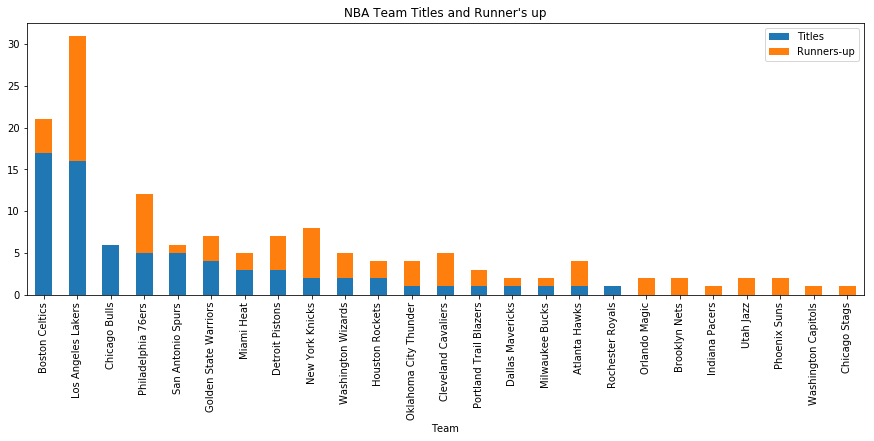

In [9]:
plot_compare_nba_champs()

# Impact of 3-Point Shooting

The definition season_wise_3P() gives the timeline of total number of 3-Pointers made and attempted every season. It also gives the mean of 3-Point percentage per season.

In [10]:
def season_wise_3P():
    #Cleaning the data based on columns requried
    nba_stats_df = cleaning_dataframe(['Year','3P','3PA','3P%'],NBA_STATS_CSV)
    
    #The season stats contains duplicate records if the player was traded in-between seasons
    season_3P_df = nba_stats_df.drop_duplicates(subset=['Year','Player'], keep="first")
    
    #Grouping the data by Year and finding the sum of 3-Pointers made and attempted; and average of the 3-point percentage
    season_3P_df = season_3P_df.groupby('Year').agg({'3P':'sum','3PA':'sum','3P%':'mean'})
    season_3P_df = season_3P_df.reset_index()
    return season_3P_df

In [11]:
def plot_season_wise_3P():
    season_3P_df = season_wise_3P()
    season_3P_df.plot(x='Year',y=['3P','3PA'],kind='line',figsize=(10,5),title="3Pointers made and attempted year wise")
    season_3P_df.plot(x='Year',y='3P%',kind='line',figsize=(10,5),title="3Pointer percentage year wise")

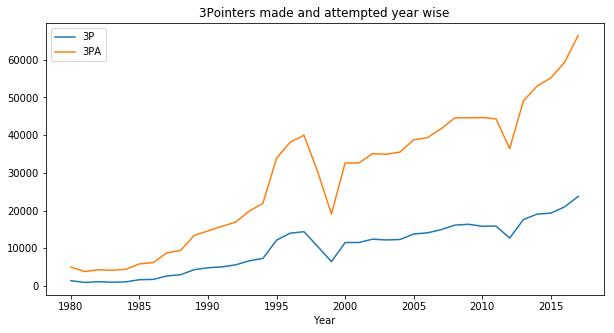

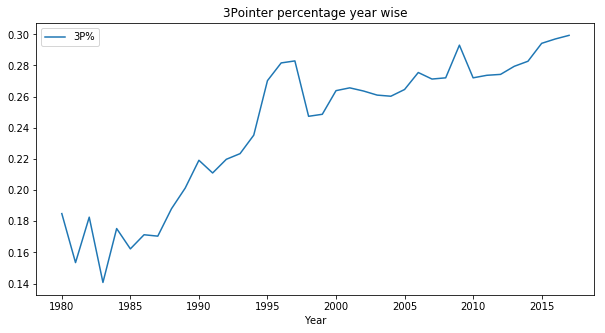

In [12]:
plot_season_wise_3P()

The definition player_point_breakdown() gives the percentage of type of shots taken between a range of years. The type of shots contain 2-pointer, 3-pointer and free throws. The pie chart gives the mean percentage of shots taken through the range of years provided to the definition. The keyword arguements accepted by this definition are 'year1' and 'year2' for range of years (int format) ; and 'plot' if we want to plot it (boolean format)

In [13]:
def player_point_breakdown(**kwargs):
    #Cleaning the data based on columns requried
    nba_player_df = cleaning_dataframe(['Player','2P','3P','FT','Year'],NBA_STATS_CSV)
    
    if kwargs.get('year1',0) and kwargs.get('year2',0):
        player_point_df = nba_player_df[(nba_player_df['Year']>kwargs['year1']) & (nba_player_df['Year']<=kwargs['year2'])]
    else:
        player_point_df = nba_player_df
    
    #The season stats contains duplicate records if the player was traded in-between seasons
    player_point_df = player_point_df.drop_duplicates(subset=['Year','Player'], keep="first")
    player_point_df_1 = player_point_df.agg({'2P':'sum','3P':'sum','FT':'sum'})
    
    #Creating a new data frame
    if kwargs.get('plot',0):
        df = pd.DataFrame({'Shot': ['2P', '3P', 'FT'], 'Sum': [player_point_df_1['2P'],player_point_df_1['3P'],player_point_df_1['FT']]})

        ax  = df.plot(kind='pie', y = 'Sum', shadow=False, autopct='%1.1f%%',labels=df['Shot'], 
                legend = False, fontsize=12,figsize=(10,7))
        ax.set_xlabel("Percent of NBA Shots Taken")
        ax.set_ylabel("")

    player_point_df = player_point_df.groupby('Year').agg({'2P':'sum','3P':'sum','FT':'sum'})
    player_point_df = player_point_df.reset_index()
    player_point_df = player_point_df.set_index('Year')
    player_point_df = player_point_df.div(player_point_df.sum(axis=1)/100, axis=0)
    player_point_df = player_point_df.round(2)
    return player_point_df

,2P,3P,FT
Year,,,
2001.0,56.82,8.93,34.25
2002.0,57.23,9.64,33.13
2003.0,56.40,9.46,34.14
2004.0,56.06,9.74,34.20
2005.0,54.54,10.06,35.40
2006.0,54.32,10.33,35.36
2007.0,54.26,10.81,34.94
2008.0,54.73,11.68,33.58
2009.0,54.23,11.83,33.94


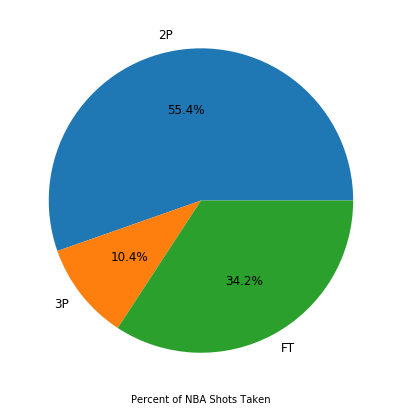

In [14]:
player_point_breakdown(year1=2000,year2=2010,plot=True)

,2P,3P,FT
Year,,,
2011.0,55.13,11.56,33.31
2012.0,56.32,12.01,31.67
2013.0,55.68,13.30,31.03
2014.0,53.96,13.94,32.10
2015.0,54.29,14.35,31.36
2016.0,53.15,15.23,31.62
2017.0,51.67,16.97,31.36


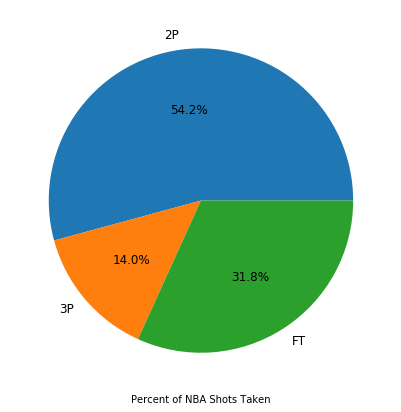

In [15]:
player_point_breakdown(year1=2010,year2=2017,plot=True)

The above pie-charts show that the 3Points made have increased a lot in the years and that game has started to shift towards 3points play. For the year 2017, the total points scored had about 17% 3Pointers.

The definition player_3p_responsible() gives the top 5 3-pointers between a range of years based on the number of 3-pointers made. We use that data to plot a line graph to show the timeline of 3-point percentage for each of those 5 players. The keyword arguements accepted by this definition are 'year1' and 'year2' for range of years (int format) ; and 'index_value' if we want only the top n records (int format)

In [16]:
def player_3p_responsible(**kwargs):
    #Cleaning the data based on columns requried
    nba_player_df = cleaning_dataframe(['Player','3P%','3P','3PA','Year'],NBA_STATS_CSV)
    
    if kwargs.get('year1',0) and kwargs.get('year2',0):
        player_3p_df = nba_player_df[(nba_player_df['Year']>kwargs['year1']) & (nba_player_df['Year']<=kwargs['year2'])]
    else:
        player_3p_df = nba_player_df
    
    #The season stats contains duplicate records if the player was traded in-between seasons
    player_3p_df = player_3p_df.drop_duplicates(subset=['Year','Player'], keep="first")
    player_3p_df = player_3p_df.groupby('Player').agg({'3P':'sum','3PA':'sum','3P%':'mean'})
    if kwargs.get('index_value',0):
        player_3p_df = player_3p_df.sort_values(by=["3P"],ascending=False)[:kwargs['index_value']]
    else:
        player_3p_df = player_3p_df.sort_values(by=["3P"],ascending=False)
        
    return player_3p_df
    

In [17]:
player_3p_responsible(year1=2000,year2=2010,index_value=5)

,3P,3PA,3P%
Player,,,
Ray Allen,1947.0,4895.0,0.3966
Peja Stojakovic,1546.0,3811.0,0.4033
Rashard Lewis,1546.0,3923.0,0.3920
Jason Terry,1477.0,3833.0,0.3875
Chauncey Billups,1390.0,3498.0,0.3949


In [18]:
player_3p_responsible(year1=2010,year2=2017,index_value=5)

,3P,3PA,3P%
Player,,,
Stephen Curry,1751.0,3999.0,0.440286
Klay Thompson,1328.0,3171.0,0.418333
James Harden,1289.0,3553.0,0.364857
Wesley Matthews,1189.0,3100.0,0.384714
Kyle Korver,1153.0,2571.0,0.445714


The definition players_3P_percet() takes 2 key word arguements 'year1' and 'year2' and returns the seasons data of the players with highest 3 pointers made between the year year1 and year2. Both year1 and year2 are integer values.

In [19]:
def players_3P_percet(**kwargs):
    #Cleaning the data based on columns requried
    nba_player_df = cleaning_dataframe(['Year','Player','3P%'],NBA_STATS_CSV)
    
    if kwargs.get('year1',0) and kwargs.get('year2',0):
        player_3p_df = nba_player_df[(nba_player_df['Year']>kwargs['year1']) & (nba_player_df['Year']<=kwargs['year2'])]
        player_3p_responsible_df = player_3p_responsible(**kwargs)
    else:
        player_3p_df = nba_player_df
        player_3p_responsible_df = player_3p_responsible(**kwargs)
    
    #Calling definition player_3p_responsible() to give names of the top 5 3-Pointer made players
    #player_3p_responsible_df = player_3p_responsible(year1,year2)
    player_3p_responsible_df = player_3p_responsible_df.reset_index()
    player_3p_df = player_3p_df[nba_player_df['Player'].isin(player_3p_responsible_df['Player'])]
    
    #The season stats contains duplicate records if the player was traded in-between seasons
    player_3p_df = player_3p_df.drop_duplicates(subset=['Year','Player'], keep="first")
    return player_3p_df

In [20]:
def plot_players_responsible_3P(**kwargs):
    player_3p_df = players_3P_percet(**kwargs)
    player_3p_df = player_3p_df.pivot(index='Year', columns='Player', values='3P%')
    ax = player_3p_df.plot(legend=True,figsize=(15,5),title="3Point Percentage timeline by players who made most 3-Points in the duration")
    ax.set_ylim(0.30,0.5)

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


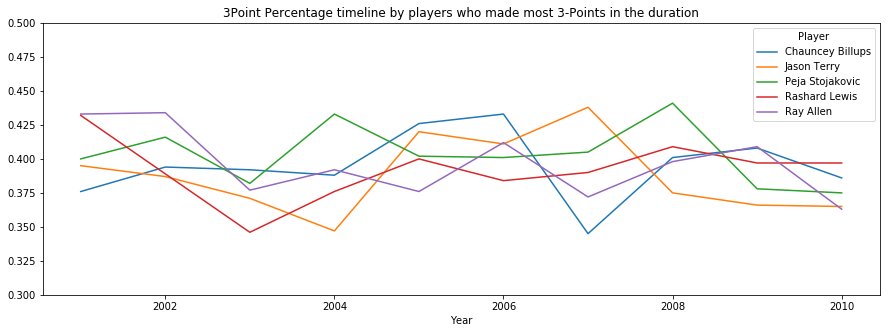

In [21]:
plot_players_responsible_3P(year1=2000,year2=2010,index_value=5)

C:\Users\krish\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


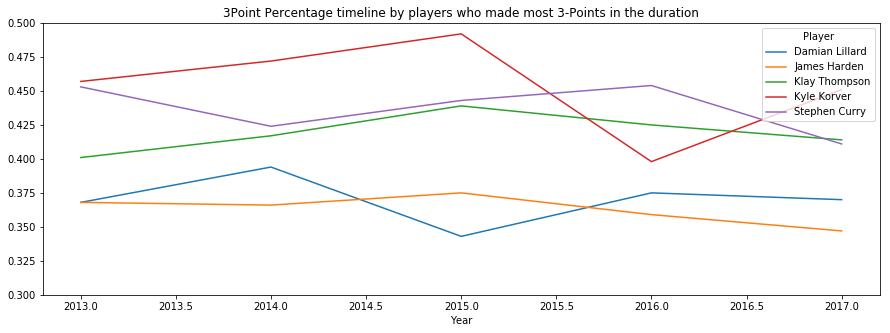

In [22]:
plot_players_responsible_3P(year1=2012,year2=2017,index_value=5)

From the above data, we can infer that the 3pointers made and attempted have increased throughout years. The 3Pointer efficiency has also increased and when comparing the years of 2000-2010 and 2010-2017 with players who have scored the most 3Pointers, we can see that the 3Point percent efficiency has been more constant in year 2010-2017, whereas for 2000-2010 the 3Point percent has fluctuated a lot.

# Percentage of Players from College/State/College based on position

The player_College() definition gives the percent of players from each college. The pie chart gives the top n (index_based) universities. The index_based is an integer value.

In [23]:
def player_College(**kwargs):
    #Cleaning the data based on columns requried
    nba_player_df = cleaning_dataframe(['Player','College'],NBA_PLAYER_CSV)

    #Grouping data based on birth state and counting the number of players from each state
    state_df = nba_player_df.groupby('College').agg({'Player':'count'})
    
    if kwargs.get('index_value',0):
        #Selecting the top n states from the dataframe
        top_state_df = state_df.sort_values(by=["Player"],ascending=False)[:kwargs['index_value']]
        top_state_df = top_state_df.reset_index()

        #Selecting all other states apart from top n and summing them up
        state_df = state_df.sort_values(by=["Player"],ascending=False)[kwargs['index_value']:]
        state_df = state_df.reset_index()
        state_df = state_df.agg({'Player':'sum'})

        #Assigning Other to count of all the remaining states except top n states
        top_state_df.loc[kwargs['index_value']] = ["Other"] + [state_df['Player']]
    else:
        top_state_df = state_df.sort_values(by=["Player"],ascending=False)
        top_state_df = top_state_df.reset_index()

    return top_state_df

In [24]:
def plot_player_College(**kwargs):
    college_df = player_College(**kwargs)

    ax  = college_df.plot(kind='pie', y = 'Player', shadow=False, autopct='%1.1f%%',labels=college_df['College'], 
                legend = False, fontsize=12,figsize=(10,7))
    ax.set_xlabel("Percent of NBA athletes College wise")
    ax.set_ylabel("")

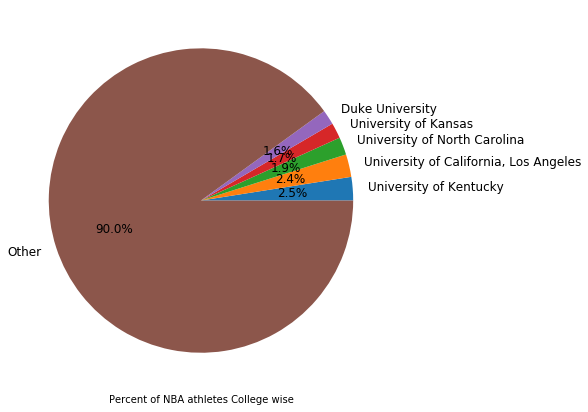

In [25]:
plot_player_College(index_value=5)

The player_College() definition gives the percent of players from each state. The pie chart gives the top n (index_based) states. The index_based is an integer value.

In [26]:
def player_state(**kwargs):
    #Cleaning the data based on columns required
    nba_player_df = cleaning_dataframe(['Player','birth_state'],NBA_PLAYER_CSV)
    
    #Grouping data based on birth state and counting the number of players from each state
    state_df = nba_player_df.groupby('birth_state').agg({'Player':'count'})
    
    if kwargs.get('index_value',0):
        #Selecting the top n states from the dataframe
        top_state_df = state_df.sort_values(by=["Player"],ascending=False)[:kwargs['index_value']]
        top_state_df = top_state_df.reset_index()

        #Selecting all other states apart from top n and summing them up
        state_df = state_df.sort_values(by=["Player"],ascending=False)[kwargs['index_value']:]
        state_df = state_df.reset_index()
        state_df = state_df.agg({'Player':'sum'})

        #Assigning Other to count of all the remaining states except top n states
        top_state_df.loc[kwargs['index_value']] = ["Other"] + [state_df['Player']]
    else:
        top_state_df = state_df.sort_values(by=["Player"],ascending=False)
        top_state_df = top_state_df.reset_index()

    return top_state_df

In [27]:
def plot_player_state(**kwargs):
    state_df = player_state(**kwargs)
    ax  = state_df.plot(kind='pie', y = 'Player', shadow=False, autopct='%1.1f%%',labels=state_df['birth_state'], 
                    legend = False, fontsize=12,figsize=(10,7))
    ax.set_xlabel("Percent of NBA athletes state wise")
    ax.set_ylabel("")

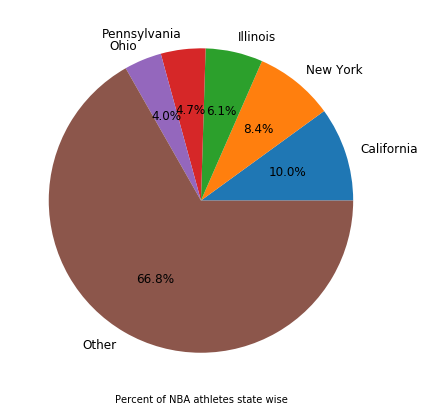

In [28]:
plot_player_state(index_value=5)

The player_College() definition gives the percent of players from each college based on the position. The pie chart gives the top n (index_based) universities. The index_based is an integer value. The available positions are 'G','C','F'.

In [29]:
def player_position(**kwargs):
    #Cleaning the data based on columns required
    nba_player_df = cleaning_dataframe(['name','position','college'],NBA_POSITION_CSV)
    
    if kwargs.get('index_value',0) and kwargs.get('position_check',0):
        #Grouping data based on college and counting the number of players from each college
        player_position_df = nba_player_df[nba_player_df['position'].str.contains(kwargs['position_check'])]
        player_position_df = player_position_df.groupby('college').agg({'name':'count'})

        #Selecting the top n college from the dataframe
        top_state_df = player_position_df.sort_values(by=["name"],ascending=False)[:kwargs['index_value']]
        top_state_df = top_state_df.reset_index()

        #Selecting all other college apart from top 3 and summing them up
        player_position_df = player_position_df.sort_values(by=["name"],ascending=False)[kwargs['index_value']:]
        player_position_df = player_position_df.reset_index()
        player_position_df = player_position_df.sum()

        #Assigning Other to count of all the remaining college except top 3 college
        top_state_df.loc[kwargs['index_value']] = ["Other"] + [player_position_df['name']]
        player_position_df = top_state_df
    
    elif kwargs.get('position_check',0):
        player_position_df = nba_player_df[nba_player_df['position'].str.contains(kwargs['position_check'])]
        player_position_df = player_position_df.groupby('college').agg({'name':'count'})
        player_position_df = player_position_df.sort_values(by=["name"],ascending=False)
        player_position_df = player_position_df.reset_index()
    else:
        player_position_df = nba_player_df
        player_position_df = player_position_df.groupby('college').agg({'name':'count'})
        player_position_df = player_position_df.sort_values(by=["name"],ascending=False)
        player_position_df = player_position_df.reset_index()

    return player_position_df

In [30]:
def plot_player_position(**kwargs):
    #Positions available are 'G' for guard, 'F' for forward, 'C' for Centre

    state_df = player_position(**kwargs)
    ax  = state_df.plot(kind='pie', y = 'name', shadow=False, autopct='%1.1f%%',labels=state_df['college'], 
                    legend = False, fontsize=12,figsize=(10,7))
    ax.set_xlabel("Percent of players position from each state")
    ax.set_ylabel("")

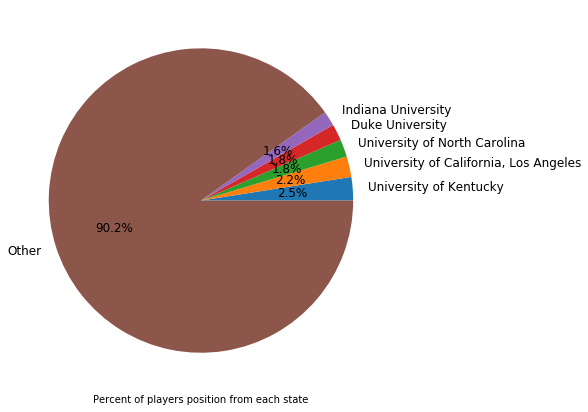

In [31]:
#Positions available are 'G' for guard, 'F' for forward, 'C' for Centre.
#For combinations use | (pipe) as separator. Eg: 'C|F'
plot_player_position(position_check='G',index_value=5)

The definition nba_US_population() compares the percentage of nba players per state vs the mean population of states from 1950-2015. The definition accepts a key word arguement 'index_value' that returns the n number of desired states in descending order of percentage.

In [32]:
def nba_US_population(**kwargs):
    #Cleaning the data based on columns requried
    US_census_df = cleaning_dataframe(['State','2015','2010','1990','1980','1970','1960','1950'],US_CENSUS_CSV)
    
    #Retrieving the nba-statewise dataframe
    nba_state_df = player_state()
    nba_state_df['Player-Percent'] = nba_state_df['Player'] *100 /  nba_state_df['Player'].sum()
    
    #Performing mean on states of the US population
    US_census_df = US_census_df[:-1]
    US_census_df = US_census_df.set_index('State')
    US_census_df['mean'] = round(US_census_df.mean(axis=1))
    US_census_df = US_census_df[['mean']]
    US_census_df['US-Population-Percent'] = US_census_df['mean'] *100 /  US_census_df['mean'].sum()
    US_census_df = US_census_df[['US-Population-Percent']]
    US_census_df = US_census_df.reset_index()
    
    #Joining the nba_state_df and US_census_df
    nba_state_df = pd.merge(US_census_df,nba_state_df, left_on='State', right_on='birth_state',how='outer').drop(['State'],axis=1)
    if kwargs.get('index_value',0):
        nba_state_df = nba_state_df.sort_values(by=["Player"],ascending=False)[:kwargs['index_value']]
    else:
        nba_state_df = nba_state_df.sort_values(by=["Player"],ascending=False)
    
    
    nba_state_df = nba_state_df[['birth_state','US-Population-Percent','Player-Percent']]
    nba_state_df = nba_state_df.dropna(subset=['birth_state'])
    nba_state_df = nba_state_df.set_index('birth_state')
    
    
    return nba_state_df

In [33]:
def plot_nba_US_population(**kwargs):
    nba_state_df = nba_US_population(**kwargs)
    nba_state_df.plot(kind='bar',figsize=(15,5),title="NBA player and mean population percentage statewise")

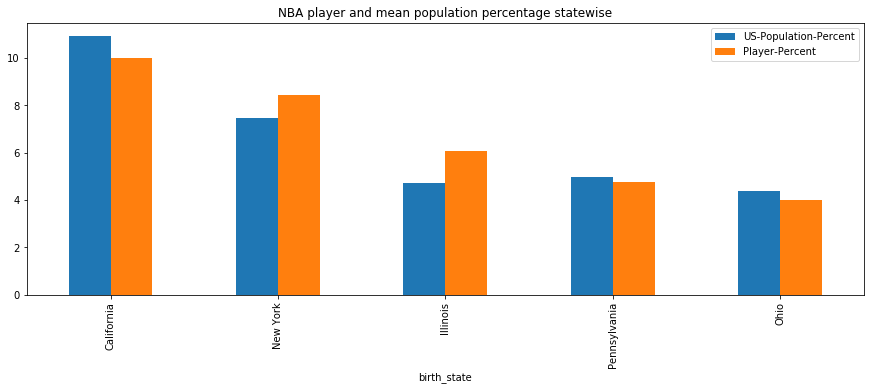

In [34]:
plot_nba_US_population(index_value=5)

# Nature of MVP's through-out years

The definition mvp() helps us to identify the points, offensive play and defensive plays of the mvp starting from 1980 upto 2017. Based on the plots we can identify if the candidates for mvp at a paritcular season has been aggressive or defensive in plays or both.

In [35]:
def mvp():
    #Cleaning the data based on columns requried
    nba_stats_df = cleaning_dataframe(['Player','Year','PTS','2P','2P%','3P','3P%','FT','AST','FT%','ORB','DRB','TRB','STL','BLK'],
                                      NBA_STATS_CSV)
    #The season stats contains duplicate records if the player was traded in-between seasons
    nba_stats_df = nba_stats_df.drop_duplicates(subset=['Year','Player'], keep="first")
    nba_mvp_df = cleaning_dataframe(['Year','Player'],NBA_MVP_CSV)
    
    mvp_stats_df = pd.merge(nba_stats_df,nba_mvp_df, on=['Year','Player'])
    
    mvp_stats_df = mvp_stats_df.groupby(['Year','Player']).agg({'PTS':'mean','2P':'mean','2P%':'mean','3P':'mean','3P%':'mean',
                                                      'FT':'mean','FT%':'mean','AST':'mean','ORB':'mean','DRB':'mean',
                                                      'TRB':'mean','STL':'mean','BLK':'mean'})
    mvp_stats_df = mvp_stats_df.reset_index()
    
    return mvp_stats_df

In [36]:
def plot_mvp():
    mvp_stats_df = mvp()
    mvp_stats_df.plot(kind='line',x='Year',y='PTS',figsize=(15,5),title="Points scored by MVPs")
    mvp_stats_df.plot(kind='line',x='Year',y=['2P','3P','FT'],figsize=(15,5),title="2Points, 3Points and Free-throws made by MVPS")
    mvp_stats_df.plot(kind='line',x='Year',y=['ORB','DRB','STL','BLK'],figsize=(15,5),title="Rebounds, Steals and Blocks made by MVPS")


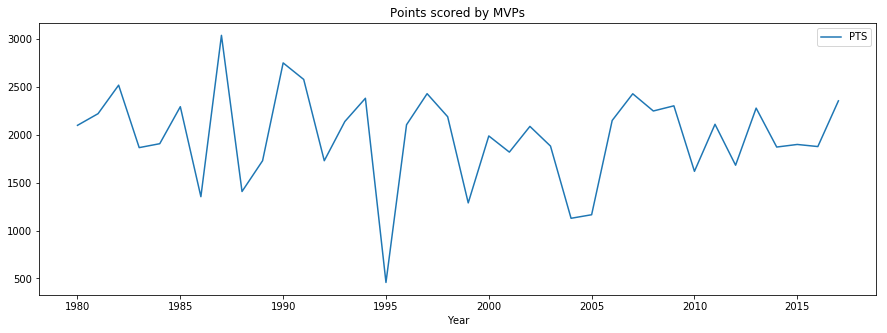

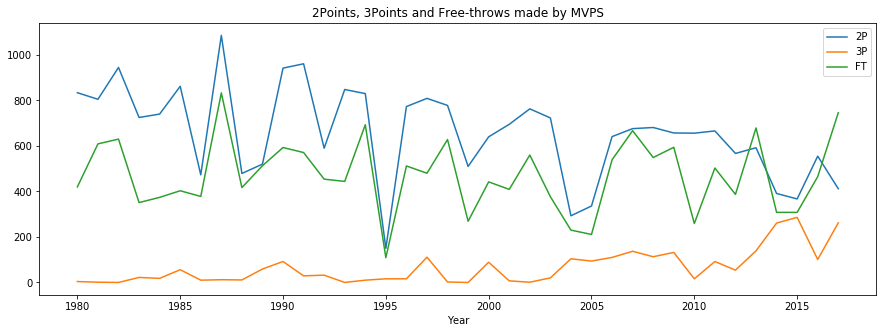

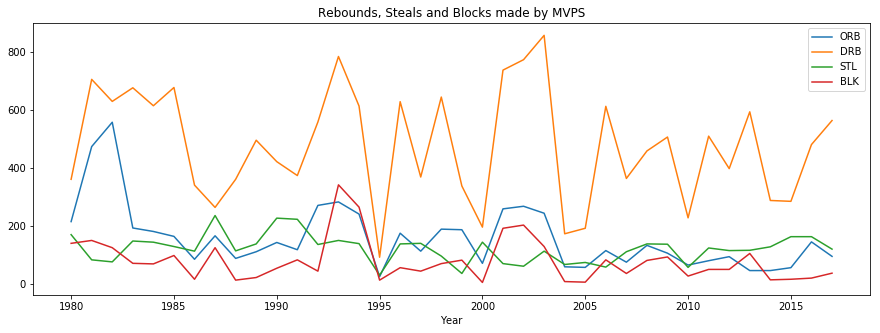

In [37]:
plot_mvp()

We observe that the MVP award was given to players in 1990 to 2005 mostly based on their all round performance (both defensive and offensive efficiency). But based on data from 2005, we see that the MVP awards have been given to players with good offensive plays throughout the season and from 2012 the MVP award winners have made a lot of 3-pointers than the MVPs in the past, indicating that the game has shifted more towards 3Point plays.

# Time Analysis of definitons using Pandas

The below definitions are used to identify the time taken to execute definition for each topic discussed above. We write this data into a csv file and then read it to display it in a dataframe. The writing to csv helps us to store the information for future references.

In [38]:
def time_career_points_top():
    start = time.time()
    career_points_top()
    end = time.time()
    return 'time_career_points_top',str(end - start)

In [39]:
def time_compare_nba_champs():
    start = time.time()
    compare_nba_champs()
    end = time.time()
    return 'time_compare_dynasties',str(end - start)

In [40]:
def time_impact_of_3_point_shooting():
    start = time.time()
    season_wise_3P()
    player_point_breakdown()
    player_3p_responsible()
    players_3P_percet()
    end = time.time()
    return 'time_impact_of_3_point_shooting',str(end - start)

In [41]:
def time_percentage_of_players():
    start = time.time()
    player_College()
    player_state()
    player_position()
    nba_US_population()
    end = time.time()
    return 'time_percentage_of_players',str(end - start)

In [42]:
def time_nature_of_mvp():
    start = time.time()
    mvp()
    end = time.time()
    return 'time_nature_of_mvp',str(end - start)

In [43]:
def write_time_results():
    try:
        os.remove(REPORT_CSV)
    except OSError:
        pass
    with open('Report.csv','a') as outfile:
        outfile.write(','.join(['Definition Name','Execution Time in seconds'])+"\n")
        outfile.write(','.join(time_career_points_top())+"\n")
        outfile.write(','.join(time_compare_nba_champs())+"\n")
        outfile.write(','.join(time_impact_of_3_point_shooting())+"\n")
        outfile.write(','.join(time_percentage_of_players())+"\n")
        outfile.write(','.join(time_nature_of_mvp())+"\n")

In [44]:
def show_time_results():
    write_time_results()
    time_results_df = cleaning_dataframe(['Definition Name','Execution Time in seconds'],REPORT_CSV)
    time_results_df = time_results_df.head()
    return time_results_df

In [45]:
show_time_results()

,Definition Name,Execution Time in seconds
0,time_career_points_top,0.218678
1,time_compare_dynasties,0.015588
2,time_impact_of_3_point_shooting,0.937455
3,time_percentage_of_players,0.091208
4,time_nature_of_mvp,0.203078
